In [143]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import pandas as pd

## 1

In [2]:
X = np.array([[0,1,0,1], [3,3,1,1], [1,1,1,1]]).T
y = np.array([1,1,0,0])
w = np.array([-2,1,0])
lambd = .07

In [144]:
def s(X, w):
    
    return sigmoid(X,w) * (1 - sigmoid(X,w)) * np.eye(X.shape[0])

def sigmoid(X, w):
    
    return 1 / (1 + np.exp(- X @ w))
    
    
def e(X, w, lambd):
    
    return np.linalg.inv(2 * lambd + X.T @ s(X, w) @ X) @ (X.T @ (sigmoid(X,w) - y) - 2 * lambd * w)

def update(X, w, lambd):
    
    w = e(X,w,lambd) + w
    return w

### 1.4

#### (a)

In [4]:
sigmoid(X, w)

array([0.95257413, 0.73105858, 0.73105858, 0.26894142])

#### (b)

In [5]:
w = update(X, w, lambd)
w

array([-2.50536624, -0.75635058,  4.08203851])

#### (c)

In [6]:
sigmoid(X, w)

array([0.85972246, 0.33350396, 0.96529962, 0.69430462])

#### (d)

In [7]:
w = update(X, w, lambd)
w

array([-2.52693901, -2.41320625,  7.70142503])

## 4

In [513]:
def split(data, size):
    from math import floor
    
    dat = data.copy()
    
    # for reproducibility
    np.random.seed(24)
    
    # shuffle copied data
    np.random.shuffle(dat)
    
    if type(size) == float:
        size = floor(len(dat) * size)

    # training_data, validation_data, training_label, validation_label
    return dat[size:, :-1], dat[:size, :-1], dat[size:, -1], dat[:size, -1]

def sigmoid(r):

    return scipy.special.expit(r)
    
    
def loss(X, w, y, lambd):
    
    r = X @ w
    
    u1 = -scipy.log(1 + scipy.exp(-r))
    u2 = scipy.log(1 - sigmoid(r))
    
    u1[r <= -2.2] = r[r <= -2.2]
    u1[r > 2.2] = 0

    u2[r < -.25] = 0
    u2[r >= -.25] = -1.5
    
    ret = (np.dot(y, u1) + np.dot((1 - y), u2)) / X.shape[0]

    return lambd * np.dot(w,w) - ret
    


def deriv(X, w, y, lambd):
    
    reg = 0
    
    if lambd is not None and lambd != 0:
        reg = 1/(2*lambd)
        
    return reg + (X.T @ (sigmoid(X @ w) - y)) / X.shape[0]


def check_accuracy(pred, y):
    
    return sum(pred == y) / len(y)


def predict(X, w):
    
    return sigmoid(X@w) >= .5


def batch_train(X, y, epochs, learning_rate, lambd, ver_iter=50):
    
    w = np.zeros(X.shape[1])

    loss_history = []
    acc_history = []
    
    for i in range(epochs):
        
        l = loss(X, w, y, lambd)

        pred = predict(X, w)

        w  = w - learning_rate * deriv(X, w, y, lambd)

        if ver_iter is not None and i % ver_iter == 0:
        
            print(f'Epoch : {i}, Loss : {l}')
            
        loss_history.append(l)
        
    
    return loss_history, acc_history, w



def sgd_train(X, y, epochs, learning_rate, lambd, ver_iter=50):
    
    w = np.zeros(X.shape[1])

    loss_history = []
    acc_history = []
    
    n = X.shape[0]
    
    for i in range(epochs):
        cost = 0
        
        for j in range(n):

            p = np.random.randint(0, n)

            dat = X[[p]]
            lab = y[[p]]

            d = deriv(dat, w, lab, lambd) / n
            w  = w - learning_rate * d

            cost += loss(dat, w, lab, lambd)
        loss_history.append(cost)

            
        if ver_iter is not None and i % ver_iter == 0:
        
            print(f'Epoch : {i}, Loss : {l}')
            
        
    pred = predict(X_val, w)
    check_accuracy(pred, y_val)
    
    return loss_history, acc_history, w

In [62]:
dat = sio.loadmat('./data.mat')

train_data = dat['X']
labels = dat['y']

data = np.hstack((train_data, labels))

X_train, X_test, y_train, y_test = split(data, 600)

X_train, X_val, y_train, y_val = split(np.hstack((X_train, y_train.reshape(-1, 1))), 500)

In [63]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((4900, 12), (4900,), (500, 12), (500,))

Testing loss before any update

In [69]:
w = np.ones(X_train.shape[1])
loss(X_train, w, y_train, lambd, 2.5)

/home/hsong1101/miniconda3/envs/gluon/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


212.93674601530617

Testing update

In [70]:
learning_rate = .2
a = np.zeros(X_train.shape[1])
a = update(X_train, a, y_train, lambd, learning_rate)
a

array([3.09876531e-01, 7.90622449e-03, 1.84585714e-02, 4.17127551e-01,
       1.31646939e-03, 2.26215306e+00, 9.27859184e+00, 5.01617621e-02,
       1.58144286e-01, 2.04516327e-02, 5.33341156e-01, 3.03163265e-02])

#### 1

In [521]:
lambd = 20
learning_rate = 5e-8
epochs = 3000
ver_iter = 200


loss_history, acc_history, w = batch_train(X_train, y_train, epochs, learning_rate, lambd, ver_iter)

Epoch : 0, Loss : 1.3004274250691132
Epoch : 200, Loss : 1.3032990086507887
Epoch : 400, Loss : 1.3039546699466749
Epoch : 600, Loss : 1.1101487255721443
Epoch : 800, Loss : 0.7757586182485534
Epoch : 1000, Loss : 0.5058868369498833
Epoch : 1200, Loss : 0.351962848771431
Epoch : 1400, Loss : 0.28062055418020637
Epoch : 1600, Loss : 0.24624922504209887
Epoch : 1800, Loss : 0.22619751665485477
Epoch : 2000, Loss : 0.2189366751518054
Epoch : 2200, Loss : 0.2140604899862489
Epoch : 2400, Loss : 0.21340770441303508
Epoch : 2600, Loss : 0.21361300509260034
Epoch : 2800, Loss : 0.21376005898529576


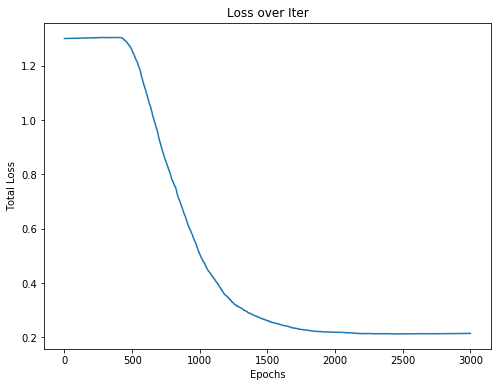

In [522]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss over Iter');

#### 2

In [416]:
lambd = 0
learning_rate = 5e-8
epochs = 1500
ver_iter = 5

loss_history, acc_history, w = sgd_train(X_train, y_train, epochs, learning_rate, lambd, ver_iter)

Epoch : 0, Loss : 0.244


0.808

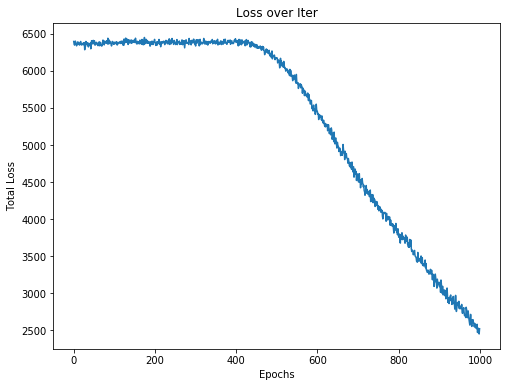

In [514]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss over Iter');

#### 4.3

Epoch : 0, Loss : 35
Epoch : 5, Loss : 35
Epoch : 10, Loss : 35
Epoch : 15, Loss : 35
Epoch : 20, Loss : 35
Epoch : 25, Loss : 35
Epoch : 30, Loss : 35
Epoch : 35, Loss : 35
Epoch : 40, Loss : 35
Epoch : 45, Loss : 35
Epoch : 50, Loss : 35
Epoch : 55, Loss : 35
Epoch : 60, Loss : 35
Epoch : 65, Loss : 35
Epoch : 70, Loss : 35
Epoch : 75, Loss : 35
Epoch : 80, Loss : 35
Epoch : 85, Loss : 35
Epoch : 90, Loss : 35
Epoch : 95, Loss : 35
Epoch : 100, Loss : 35
Epoch : 105, Loss : 35
Epoch : 110, Loss : 35
Epoch : 115, Loss : 35
Epoch : 120, Loss : 35
Epoch : 125, Loss : 35
Epoch : 130, Loss : 35
Epoch : 135, Loss : 35
Epoch : 140, Loss : 35
Epoch : 145, Loss : 35
Epoch : 150, Loss : 35
Epoch : 155, Loss : 35
Epoch : 160, Loss : 35
Epoch : 165, Loss : 35
Epoch : 170, Loss : 35
Epoch : 175, Loss : 35
Epoch : 180, Loss : 35
Epoch : 185, Loss : 35
Epoch : 190, Loss : 35
Epoch : 195, Loss : 35


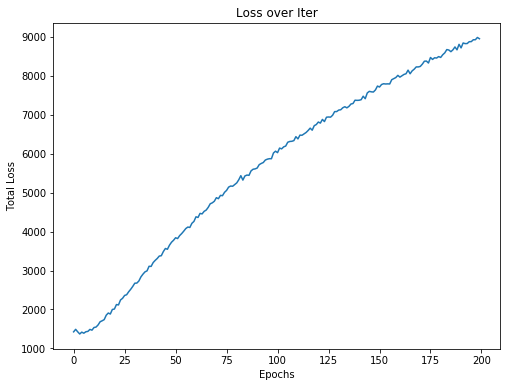

In [532]:
def batch_train(X, y, epochs, learning_rate, lambd, ver_iter=50):
    
    w = np.zeros(X.shape[1])

    loss_history = []
    acc_history = []
    
    for i in range(1, epochs+1):
        
        l = loss(X, w, y, lambd)

        pred = predict(X, w)

        w  = w - learning_rate * deriv(X, w, y, lambd)

        if ver_iter is not None and i % ver_iter == 0:
        
            print(f'Epoch : {i}, Loss : {l}')
            
        loss_history.append(l)
        learning_rate = learning_rate / i
    
    return loss_history, acc_history, w


lambd = 20
learning_rate = 5e-3
epochs = 200
ver_iter = 5

loss_history, acc_history, w = sgd_train(X_train, y_train, epochs, learning_rate, lambd, ver_iter)

plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss over Iter');

### Submission

In [ ]:
def sgd_train(X, y, epochs, learning_rate, lambd, ver_iter=50):
    
    w = np.zeros(X.shape[1])

    loss_history = []
    acc_history = []
    
    n = X.shape[0]
    
    for i in range(epochs):
        cost = 0
        
        for j in range(n):

            p = np.random.randint(0, n)

            dat = X[[p]]
            lab = y[[p]]

            d = deriv(dat, w, lab, lambd) / n
            w  = w - learning_rate * d

            cost += loss(dat, w, lab, lambd)
        loss_history.append(cost)

        learning_rate = learning_rate / i
        
        if ver_iter is not None and i % ver_iter == 0:
        
            print(f'Epoch : {i}, Loss : {l}')
            
        
    pred = predict(X_val, w)
    check_accuracy(pred, y_val)
    
    return loss_history, acc_history, w




lambd = 0
learning_rate = 1e-8
epochs = 10000
ver_iter = 1000


loss_history, acc_history, w = sgd_train(X_train, y_train, epochs, learning_rate, lambd, ver_iter)
pred = predict(X_val, w)
check_accuracy(pred, y_val)

In [ ]:
pred = predict(X_test, w)
check_accurayc(pred, y_test)

#### Submit

In [444]:
test = dat['X_test']

pred = predict(test, w)
pred = pred.astype(int)

sub = pd.DataFrame(pred, columns=['Category'], index=np.arange(1, len(pred)+1, 1), dtype=int)
sub.index.name = 'Id'

sub.to_csv('./submission.csv')